In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
from sqlalchemy import create_engine, inspect

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)


In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station


In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [9]:
inspector = inspect(engine)

In [10]:
inspector.get_table_names()

['measurement', 'station']

In [11]:
 # Using the inspector to print the column names within the 'measurement' table and its types
columns = inspector.get_columns('measurement')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [12]:
columns = inspector.get_columns('station')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


# Exploratory Precipitation Analysis

In [13]:
results = session.query(measurement.id, measurement.station, measurement.date, measurement.prcp,measurement.tobs).\
    order_by(measurement.date.desc()).all()

In [14]:
# Find the most recent date in the data set.
measurement_df = pd.DataFrame(results, columns=['id','station', 'date', 'prcp','tobs'])
measurement_df['prcp'] = measurement_df['prcp'].fillna(0)
measurement_df.set_index('date', inplace=True, )
measurement_df.head(10)

,id,station,prcp,tobs
date,,,,
2017-08-23,2724,USC00519397,0.00,81.0
2017-08-23,7635,USC00514830,0.00,82.0
2017-08-23,12187,USC00519523,0.08,82.0
2017-08-23,19550,USC00516128,0.45,76.0
2017-08-22,2723,USC00519397,0.00,82.0
2017-08-22,12186,USC00519523,0.00,82.0
2017-08-22,19549,USC00516128,0.50,76.0
2017-08-21,2722,USC00519397,0.00,81.0
2017-08-21,7634,USC00514830,0.02,79.0


In [15]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
# Calculate the date one year from the last date in data set.

query_date = dt.date(2017, 8, 23) - dt.timedelta(days=365)
print("Query Date: ", query_date)


Query Date:  2016-08-23


In [16]:
# Perform a query to retrieve the data and precipitation scores

sel = [measurement.date, 
       func.sum(measurement.prcp)]
date_str = "2016-08-23"

last_year = session.query(*sel).\
    filter(measurement.date> date_str).\
    group_by(measurement.date).\
    order_by(measurement.date.desc()).all()
last_year
            
# Save the query results as a Pandas DataFrame and set the index to the date column

last_year_df = pd.DataFrame(last_year, columns=['date', 'prcp'])
last_year_df.set_index('date', inplace=True, )
last_year_df.head()




,prcp
date,
2017-08-23,0.53
2017-08-22,0.50
2017-08-21,0.58
2017-08-20,0.01
2017-08-19,0.09


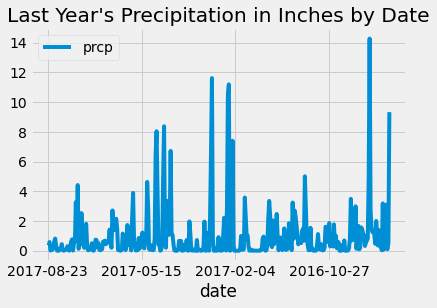

<Figure size 432x288 with 0 Axes>

In [35]:
 # Use DataFrame.plot() in order to create a bar chart of the data
last_year_df.plot()

# Set a title for the chart
plt.title("Last Year's Precipitation in Inches by Date")
plt.show()
plt.tight_layout()


In [36]:
#Use Pandas to print the summary statistics for the precipitation data.
last_year_df.describe()


,prcp
count,365.000000
mean,0.974164
std,1.776466
min,0.000000
25%,0.050000
50%,0.400000
75%,1.080000
max,14.280000


# Exploratory Station Analysis

In [19]:
# Design a query to calculate the total number stations in the dataset
    
results = session.query(station.id, station.station, station.name, station.latitude, station.longitude, station.elevation).count()  
results

9

In [20]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.

sel_join = [measurement.station, measurement.date ,measurement.tobs,station.id, station.station, station.name]
same_station = session.query(*sel_join).filter(measurement.station == station.station).all()
same_station

same_station_df = pd.DataFrame(same_station, columns=['station', 'measurement_date','tobs', 'station_id','station_join','station_name'])
same_station_df.station.value_counts()


USC00519281    2772
USC00519397    2724
USC00513117    2709
USC00519523    2669
USC00516128    2612
USC00514830    2202
USC00511918    1979
USC00517948    1372
USC00518838     511
Name: station, dtype: int64

In [21]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.

most_active_df = same_station_df.loc[same_station_df['station']=='USC00519281']
most_active_df.head(10)

,station,measurement_date,tobs,station_id,station_join,station_name
12187,USC00519281,2010-01-01,70.0,7,USC00519281,"WAIHEE 837.5, HI US"
12188,USC00519281,2010-01-02,62.0,7,USC00519281,"WAIHEE 837.5, HI US"
12189,USC00519281,2010-01-03,74.0,7,USC00519281,"WAIHEE 837.5, HI US"
12190,USC00519281,2010-01-04,75.0,7,USC00519281,"WAIHEE 837.5, HI US"
12191,USC00519281,2010-01-05,74.0,7,USC00519281,"WAIHEE 837.5, HI US"
12192,USC00519281,2010-01-06,76.0,7,USC00519281,"WAIHEE 837.5, HI US"
12193,USC00519281,2010-01-07,69.0,7,USC00519281,"WAIHEE 837.5, HI US"
12194,USC00519281,2010-01-08,66.0,7,USC00519281,"WAIHEE 837.5, HI US"
12195,USC00519281,2010-01-09,70.0,7,USC00519281,"WAIHEE 837.5, HI US"
12196,USC00519281,2010-01-10,75.0,7,USC00519281,"WAIHEE 837.5, HI US"


In [22]:

highest_temp = most_active_df['tobs'].max()
lowest_temp = most_active_df['tobs'].min()
average_temp = most_active_df['tobs'].mean()

print (f"The highest temperature at the Waihee 837.5 is {highest_temp}")
print (f"The lowest temperature at the Waihee 837.5 is {lowest_temp}")
print (f"The average temperature at the Waihee 837.5 is {average_temp}")

The highest temperature at the Waihee 837.5 is 85.0
The lowest temperature at the Waihee 837.5 is 54.0
The average temperature at the Waihee 837.5 is 71.66378066378067


In [37]:
session.query(func.max(measurement.tobs),func.min(measurement.tobs),func.avg(measurement.tobs)).filter(measurement.station=="USC00519281").all()

[(85.0, 54.0, 71.66378066378067)]

In [39]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
sel_active = [measurement.date, measurement.tobs]
date_str = "2016-08-23"
waihee = "USC00519281"

Waihee_last_year = session.query(*sel_active).\
     filter(measurement.date> date_str).\
     filter(measurement.station == waihee).\
     group_by(measurement.date).\
     order_by(measurement.date.desc()).all()
Waihee_last_year_df=pd.DataFrame(Waihee_last_year,columns=['date','temp'])
Waihee_last_year_df                                


,date,temp
0,2017-08-18,79.0
1,2017-08-17,76.0
2,2017-08-16,76.0
3,2017-08-15,77.0
4,2017-08-14,77.0
...,...,...
346,2016-08-28,73.0
347,2016-08-27,75.0
348,2016-08-26,80.0
349,2016-08-25,80.0


<AxesSubplot:ylabel='Frequency'>

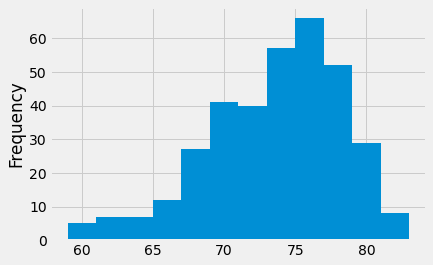

In [40]:

Waihee_last_year_df['temp']. plot(kind='hist',bins=12)


# Close session

In [41]:
# Close Session
session.close()